<h1 align=center><font size=5>Model Development</font></h1>

<h1>3. Model Development</h1>

<p>In this section, we will develop several models that will predict the rating_engineTransmission using the variables or features.</p>

Some questions we want to ask in this module
<ul>
    <li>Do I know if the features are representing a fair value for my rating_engineTransmission?</li>
    <li>Do I know if I put a fair rating_engineTransmission ?</li>
</ul>
<p>Data Analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>

<h4>Setup</h4>

 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load data and store in dataframe df:

In [2]:
# path of data 
file = 'clean_df.csv'
df = pd.read_csv(file)
df.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engine_value,engineTransmission_coolant_value,engineTransmission_engineMounting_value,engineTransmission_engineSound_value,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_clutch_value,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,0,1,0,0,0,0,0,0,0,0,1,Petrol + CNG,0.124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,1,1,0,0,0,1,0,0,1,1,1,Petrol + CNG,0.078108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,1,1,0,1,0,0,0,0,1,0,1,Diesel,0.093348,3.5
3,aj_04,2019-01-18 11:02:53,2013,1,1,1,0,1,0,1,1,1,1,0,1,Petrol + CNG,0.048233,3.5
4,aj_05,2019-01-27 12:12:06,2011,7,1,1,0,0,1,0,0,0,1,0,1,Petrol + CNG,0.074368,4.0


<h2>Outlook:</h2>
<pre>As we know that our the dependent variable in our model which is rating_engineTransmission is a rating of the engine of different cars. It is essentialy a discrete variable. Therefore, our prediction consists of using a multiclass classifier.
We can also use a model like <b>Ordered Logits</b> if we want to solve problems like these using regression.

We shall apply more than one model. Just because finding the appropriate model for a dataset with discrete values in the dependent variable can result in more than one thing. We will use a regression model here and probablya classification model too. So, let's begin:

<h3>1. Linear Regression and Multiple Linear Regression</h3>

<h4>Linear Regression</h4>


<p>One example of a Data  Model that we will be using is</p>
<b>Simple Linear Regression</b>.

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>



$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$


 <b>Linear function:</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line 0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

<h4>Lets load the modules for linear regression</h4>

In [7]:
from sklearn.linear_model import LinearRegression

<h4>Create the linear regression object</h4>

In [8]:
lm = LinearRegression()
lm

LinearRegression()

<h4>We found that the dependent variable showed the highest correlation with the "year" variable.</h4>

In [9]:
X = df[['year']]
Y = df['rating_engineTransmission']

In [10]:
lm.fit(X,Y)

LinearRegression()

 We can output a prediction 

In [11]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([3.2475587 , 3.11554623, 3.77560859, 3.90762106, 3.64359612])

<h4>What is the value of the intercept (a)?</h4>

In [12]:
lm.intercept_

-261.83348305895294

<h4>What is the value of the Slope (b)?</h4>

In [13]:
lm.coef_

array([0.13201247])

<h3>What is the final estimated linear model we get?</h3>

As we saw above, we should get a final linear model with the structure:

$$
Yhat = a + b  X
$$

Plugging in the actual values we get:

<b>rating_engineTransmission</b> = -261.83348305895294 - 0.13201247 x  <b>year</b>

In [14]:
lm1 = LinearRegression()

Using odometer_reading.

In [15]:
X=df[['odometer_reading']]
Y=df['rating_engineTransmission']
lm1.fit(X,Y)
lm1

LinearRegression()

<h4>Slope</h4>

In [16]:
lm1.coef_

array([-6.58560012])

<h4>Intercept</h4>

In [17]:
lm1.intercept_

4.128199073148276

<h4>Multiple Linear Regression</h4>

$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

The equation is given by

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>odometer_reading</li>
    <li>year</li>
</ul>
Let's develop a model using these variables as the predictor variables.

In [18]:
Z = df[['odometer_reading', 'year']]

Fit the linear model using the four above-mentioned variables.

In [20]:
lm.fit(Z, df['rating_engineTransmission'])

LinearRegression()

What is the value of the intercept(a)?

In [21]:
lm.intercept_

-234.15955061348612

What are the values of the coefficients (b1, b2, b3, b4)?

In [22]:
lm.coef_

array([-2.69627463,  0.11835273])

 What is the final estimated linear model that we get?

As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

What is the linear function we get in this example?

<b>rating_engineTransmission</b> = -234.15955061348612 - 2.696274623 x <b>odometer_reading</b> + 0.11835273 x <b>year</b>

<h3>2)  Model Evaluation using Visualization</h3>

Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.

import the visualization package: seaborn

In [24]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h3>Regression Plot</h3>

<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatter plot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

(0.0, 5.392384887829217)

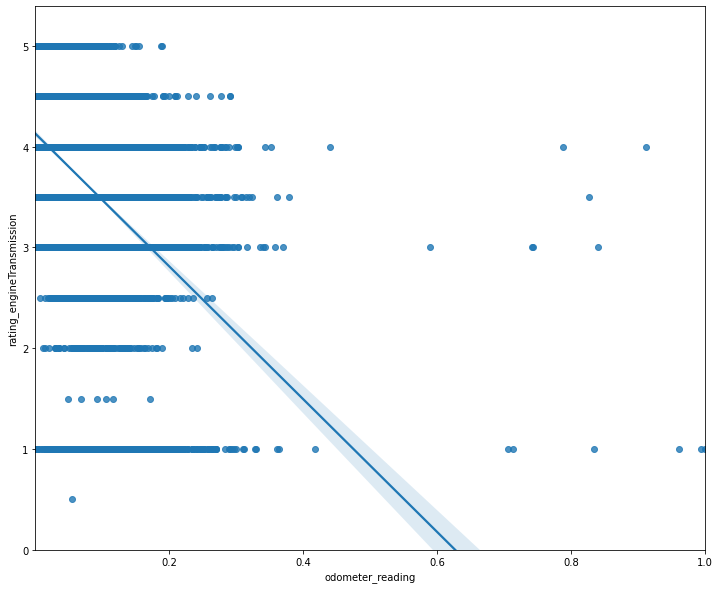

In [25]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="odometer_reading", y="rating_engineTransmission", data=df)
plt.ylim(0,)

(0.0, 5.225)

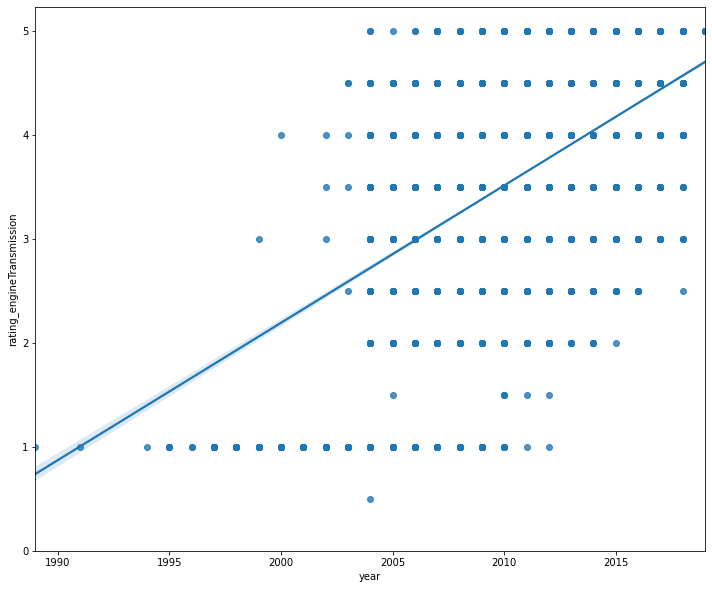

In [26]:
plt.figure(figsize=(width, height))
sns.regplot(x="year", y="rating_engineTransmission", data=df)
plt.ylim(0,)

<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

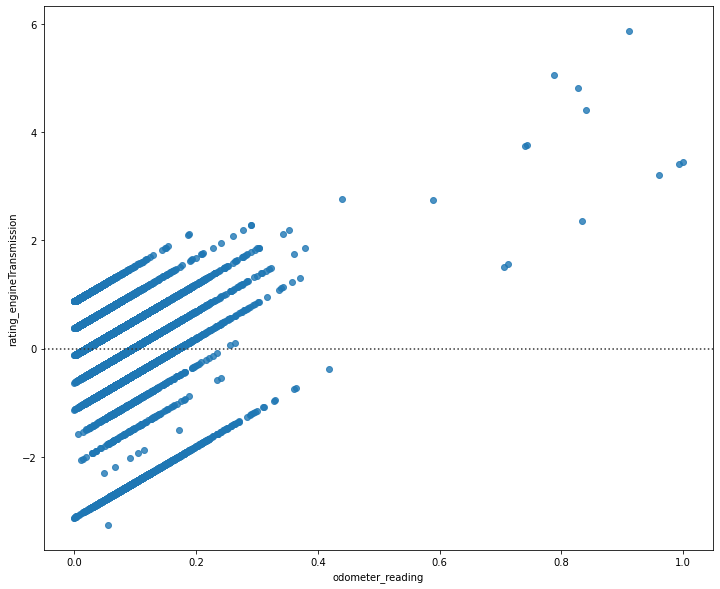

In [27]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['odometer_reading'], df['rating_engineTransmission'])
plt.show()

<h3>Multiple Linear Regression</h3>

<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

First lets make a prediction 

In [28]:
Y_hat = lm.predict(Z)

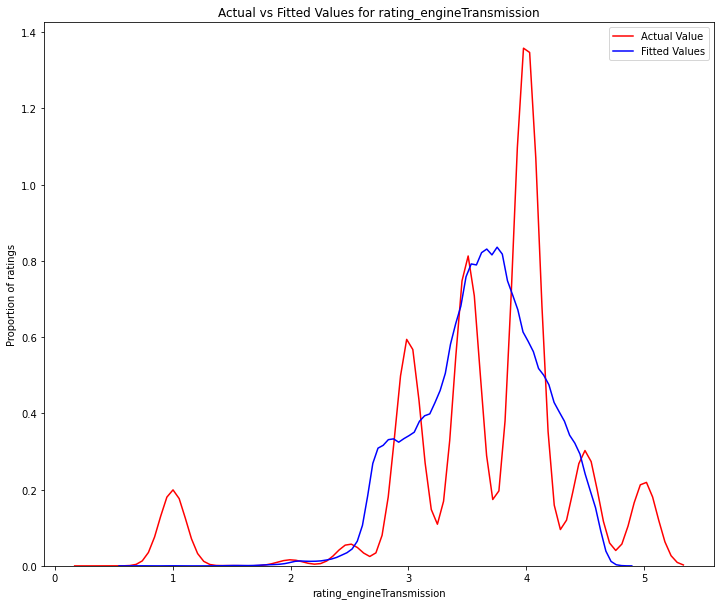

In [29]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['rating_engineTransmission'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for rating_engineTransmission')
plt.xlabel('rating_engineTransmission')
plt.ylabel('Proportion of ratings')

plt.show()
plt.close()

<h2>Applying Multpile Linear regression with relevant variables using train_test_split.</h2>

In [63]:
X = df[['odometer_reading','year']]
y = df["rating_engineTransmission"]

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (21045, 2) (21045,)
Test set: (5262, 2) (5262,)


In [65]:
yhat = lm.predict(X_test)
yhat

array([3.49858443, 4.04046966, 3.80620091, ..., 3.3647166 , 3.83686603,
       4.12877238])

<h2>Part 4: Measures for In-Sample Evaluation</h2>

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

<h3>Model 1: Simple Linear Regression</h3>

Let's calculate the R^2

In [31]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.13199557655707683


We can say that ~ 13.199% of the variation of the price is explained by this simple linear model.

Let's calculate the MSE

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [32]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [3.30763248 3.6138105  3.51344586 3.8105555 ]


lets import the function <b>mean_squared_error</b> from the module <b>metrics</b>

In [33]:
from sklearn.metrics import mean_squared_error

we compare the predicted results with the actual results 

In [35]:
mse = mean_squared_error(df['rating_engineTransmission'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  0.6236393809922252


<h3>Model 2: Multiple Linear Regression</h3>

Let's calculate the R^2

In [36]:
# fit the model 
lm.fit(Z, df['rating_engineTransmission'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['rating_engineTransmission']))

The R-square is:  0.36248796010431406


We can say that ~ 36.24 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE

 we produce a prediction 

In [66]:
Y_predict_multifit = lm.predict(Z)

 we compare the predicted results with the actual results 

In [67]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['rating_engineTransmission'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  0.45803639151820474


<h3>Model 3: Multiple Linear Regression with train_test_split</h3>

In [69]:
# fit the model 
lm.fit(X, df['rating_engineTransmission'])
# Find the R^2
print('The R-square is: ', lm.score(X, df['rating_engineTransmission']))

The R-square is:  0.36248796010431406


<h2>Conclusion:</h2>

<p>Comparing these models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset.